In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from scipy.signal import find_peaks
from calibrator import Calibrator

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
def load_calibration_lines(input_file='calibration_lines.csv',
                           elements=["Hg", "Ar", "Xe", "CuNeAr", "Kr"],
                           min_wavelength=300,
                           max_wavelength=800):
    cal_lines = np.loadtxt(input_file, delimiter=',', dtype='U', skiprows=1)
    wave = cal_lines[:, 0].astype('float')
    element = cal_lines[:, 1]
    # Get lines of the requested elements
    lines = wave[np.isin(element, elements)]
    # Get only lines within the requested wavelength
    mask = (lines > min_wavelength) * (lines < max_wavelength)
    return lines[mask]

In [3]:
atlas = load_calibration_lines(
    "calibration_lines.csv", elements=["Xe"], min_wavelength=400, max_wavelength=800)

spectrum = np.median(fits.open('v_a_20190516_55_1_0_1.fits')[0].data, axis=0)[200:]

peaks, _ = find_peaks(spectrum, distance=10., threshold=20.)

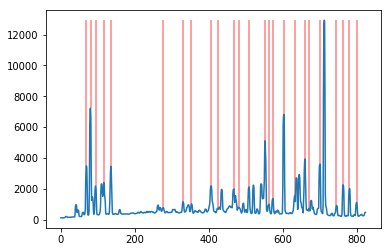

In [4]:
plt.plot(spectrum)
plt.vlines(peaks,
              spectrum[peaks.astype('int')],
              spectrum.max(),
              colors='red',
              alpha=0.5)

In [5]:
c = Calibrator(peaks, atlas)
c.set_fit_constraints(
    min_slope=0.01,
    max_slope=100.0,
    min_intercept=0,
    max_intercept=10000,
    fit_tolerance=0.5,
    line_fit_thresh=10)

best_p = c.fit()

[ 5.40662626e-07 -6.81247059e-04  2.85701101e-01  4.33545027e+02]


[-1.80016430e-07  1.78292861e-04  3.17160932e-02  4.55071361e+02]


[-1.96533828e-07  1.76668282e-04  2.68398430e-02  4.35508567e+02]


[ 1.11400394e-06 -1.73782326e-03  9.00047875e-01  3.18631630e+02]


[-1.66140669e-07  1.67893504e-04  2.96962915e-02  4.15966357e+02]



Peak at: 418.7601636656242 nm
Peak at: 419.33151500768406 nm
- matched to 419.35 nm
Peak at: 420.1033219054925 nm
Peak at: 421.41097378253954 nm
Peak at: 422.6264473985347 nm
Peak at: 433.5433880437007 nm
Peak at: 438.0791388305909 nm
- matched to 438.39 nm
Peak at: 440.0621640222402 nm
Peak at: 444.5792441287888 nm
Peak at: 446.0767309462554 nm
Peak at: 449.6069729504532 nm
- matched to 450.1 nm
Peak at: 450.60537772959947 nm
Peak at: 452.67044617163197 nm
- matched to 452.47 nm
Peak at: 455.57223539800793 nm
Peak at: 456.25401372004467 nm
Peak at: 456.85017628599417 nm
Peak at: 458.4934338398556 nm
- matched to 458.28 nm
Peak at: 459.85522776034054 nm
Peak at: 460.93554213898676 nm
Peak at: 461.29206612893483 nm
Peak at: 462.05566794993564 nm
- matched to 462.43 nm
Peak at: 462.2552222977446 nm
- matched to 462.43 nm
Peak at: 462.57707887742083 nm
- matched to 462.43 nm
Peak at: 462.56817520997595 nm
- matched to 462.43 nm
Peak at: 462.4334855639922 nm
- matched to 462.43 nm
Peak at:

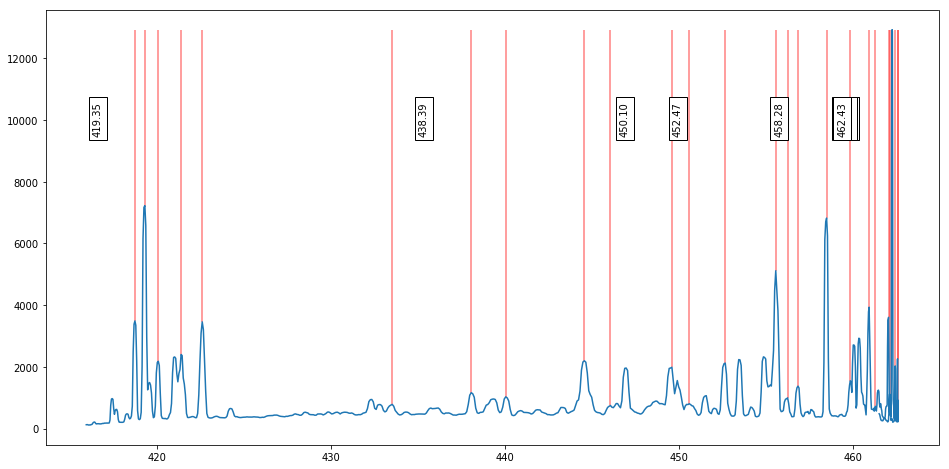

[-1.66140669e-07  1.67893504e-04  2.96962915e-02  4.15966357e+02]


In [6]:
c.plot_fit(spectrum, best_p)
print(best_p)